Loading KDD Cup 1999 dataset (10%)...
Applying sparse one-hot encoding...
Reducing dimensions with TruncatedSVD...
Training Isolation Forest...

📋 Classification Report:

              precision    recall  f1-score   support

     anomaly       0.05      0.15      0.08      3377
      normal       0.97      0.90      0.93     97278

    accuracy                           0.88    100655
   macro avg       0.51      0.53      0.50    100655
weighted avg       0.94      0.88      0.91    100655



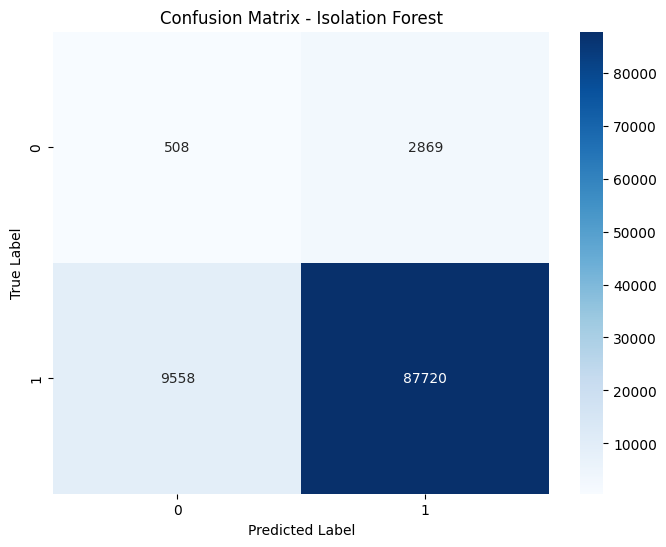

In [4]:
# 📦 Import Libraries
from sklearn.datasets import fetch_kddcup99
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 🔍 Step 1: Load the Dataset
print("Loading KDD Cup 1999 dataset (10%)...")
data = fetch_kddcup99(subset='SA', percent10=True, as_frame=True)
X = data.data
y = data.target.astype(str)

# 🏷️ Step 2: Convert Labels to Binary (Normal vs Anomaly)
y_binary = y.apply(lambda x: 'normal' if x == 'normal.' else 'anomaly')

# 🧼 Step 3: Memory-Efficient One-Hot Encoding (Sparse Matrix)
print("Applying sparse one-hot encoding...")
encoder = OneHotEncoder(sparse_output=True, handle_unknown='ignore')
X_sparse = encoder.fit_transform(X)

# 🧬 Step 4: Dimensionality Reduction using TruncatedSVD
print("Reducing dimensions with TruncatedSVD...")
svd = TruncatedSVD(n_components=100, random_state=42)
X_reduced = svd.fit_transform(X_sparse)

# 🌲 Step 5: Isolation Forest for Anomaly Detection
print("Training Isolation Forest...")
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X_reduced)

# 🔎 Step 6: Predict Anomalies (-1 = Anomaly, 1 = Normal)
preds = model.predict(X_reduced)
pred_labels = np.where(preds == 1, 'normal', 'anomaly')

# 📋 Step 7: Evaluation Report
print("\n📋 Classification Report:\n")
print(classification_report(y_binary, pred_labels))

# 🎯 Step 8: Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_binary, pred_labels), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Isolation Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
